In [ ]:
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


SVR()

In [15]:
# Generate synthetic regression data with 20 features
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR with RBF kernel
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)


SVR()

In [16]:
from explainer.LocalExplainer import RBFLocalExplainer

explainer_recursive = RBFLocalExplainer(svr)
shapley_values = explainer_recursive.explain(X_test[0]) 


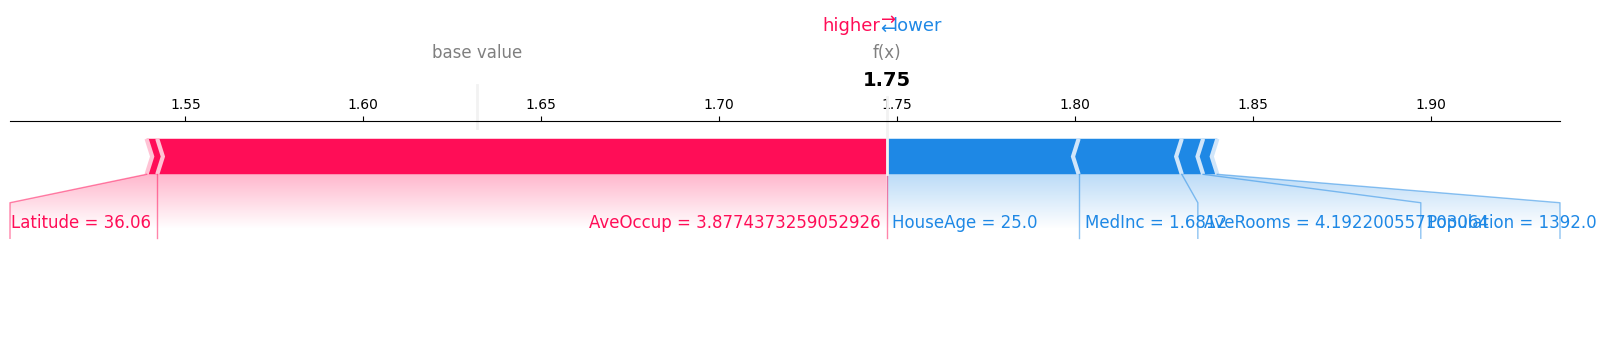

In [19]:
import shap
import matplotlib.pyplot as plt
import numpy as np 
shapley_values = np.round(np.array(shapley_values), decimals=3)

# Use the feature names from the dataset
feature_names = data.feature_names

# Plot the force plot for the first test instance
shap.force_plot(
    base_value=svr.intercept_,
    shap_values=np.array(shapley_values),
    features=X_test[0],
    feature_names=feature_names,
    matplotlib=True
)
plt.show()